In [7]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
# Filtering Dataframe ON Data Analysts
DA_df = df[df['job_title_short'] == 'Data Analyst'].copy()


In [8]:
# Extracting month name and number from real date
DA_df['job_posted_month'] = DA_df['job_posted_date'].dt.month_name()
DA_df['job_posted_month_no'] = DA_df['job_posted_date'].dt.month
# Exploding Skills for each job in diffrent rows
df_exploded = DA_df.explode('job_skills')
# Making Pivot Table with 2 index for correct order (first  january and last december)
pivot_df = df_exploded.pivot_table(index=['job_posted_month_no','job_posted_month'],columns='job_skills',aggfunc='size').droplevel(0)
# adding a row named total for simple sorting
pivot_df.loc['Total'] = pivot_df.sum()
# sorting values and droping total 
pivot_df = pivot_df.sort_values('Total',axis=1,ascending=False).iloc[:,:5]
df_line_plot = pivot_df.drop('Total',axis=0)

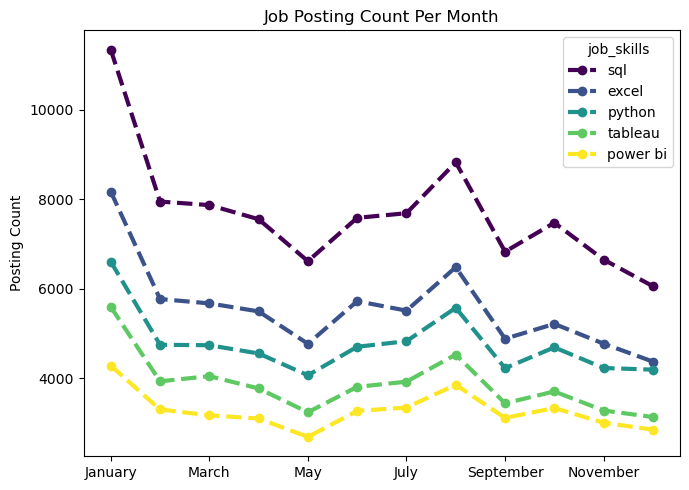

In [9]:

df_line_plot.plot(kind='line',
                  marker='o',
                  markersize = 6,
                  linewidth=3,
                  linestyle='--',
                  colormap='viridis',
                  figsize= (7,5)              
)

plt.title('Job Posting Count Per Month')
plt.xlabel('')
plt.ylabel('Posting Count')

plt.tight_layout()
plt.show()

In [ ]:
group_df = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
df_scatter_plot = group_df.sort_values('skill_count',ascending=False).head(10)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


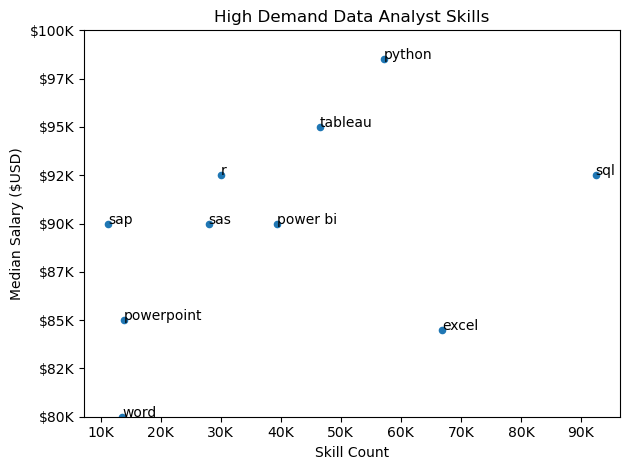

In [12]:

df_scatter_plot.plot(kind='scatter',x='skill_count',y='median_salary')
for i,txt in enumerate(df_scatter_plot.index):
    plt.text(df_scatter_plot['skill_count'].iloc[i],df_scatter_plot['median_salary'].iloc[i],txt)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{int(x/1000)}K"))

plt.xlabel('Skill Count')
plt.ylabel('Median Salary ($USD)')
plt.title('High Demand Data Analyst Skills')
plt.ylim(80000,100000)

plt.tight_layout()
plt.show()

